In [1]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


/anaconda3/envs/tf140/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


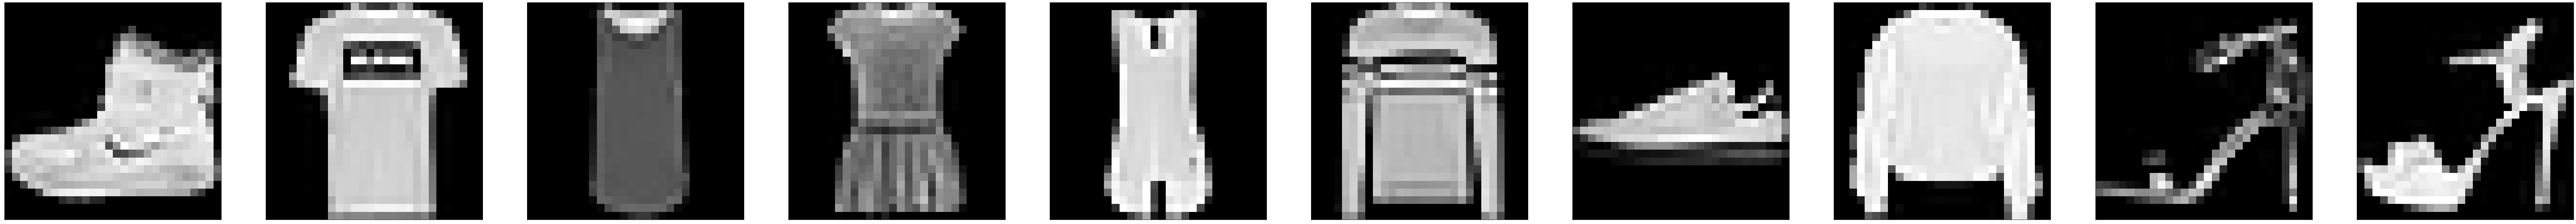

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9,15))
fig.subplots_adjust(left=0, right=10, bottom=0, top=0.5, hspace=0, wspace=0.05)

for i in range(10):
    ax1 = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax2 = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax1.imshow(x_train[i], cmap='gray')
    ax2.imshow(x_train[i], cmap='gray')

In [4]:
from tensorflow.keras.utils import to_categorical

In [7]:
x_train = x_train.reshape(-1,784)/255
x_test = x_test.reshape(-1, 784)/255
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [15]:
model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0,3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stopping])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 1.6306 - acc: 0.4452 - val_loss: 0.9320 - val_acc: 0.6385
Epoch 2/10
 - 2s - loss: 0.8117 - acc: 0.6919 - val_loss: 0.7382 - val_acc: 0.7314
Epoch 3/10
 - 2s - loss: 0.6900 - acc: 0.7454 - val_loss: 0.6814 - val_acc: 0.7543
Epoch 4/10
 - 2s - loss: 0.6337 - acc: 0.7678 - val_loss: 0.6483 - val_acc: 0.7626
Epoch 5/10
 - 2s - loss: 0.6053 - acc: 0.7796 - val_loss: 0.6259 - val_acc: 0.7716
Epoch 6/10
 - 2s - loss: 0.5820 - acc: 0.7888 - val_loss: 0.5956 - val_acc: 0.7856
Epoch 7/10
 - 2s - loss: 0.5588 - acc: 0.7989 - val_loss: 0.5826 - val_acc: 0.7876
Epoch 8/10
 - 2s - loss: 0.5389 - acc: 0.8064 - val_loss: 0.5613 - val_acc: 0.7982
Epoch 9/10
 - 2s - loss: 0.5265 - acc: 0.8108 - val_loss: 0.5571 - val_acc: 0.7993
Epoch 10/10
 - 2s - loss: 0.4967 - acc: 0.8227 - val_loss: 0.5248 - val_acc: 0.8139


In [17]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(acc)

0.5248083025932312
0.8139
